<a href="https://colab.research.google.com/github/OscarRojasG/ADA-Informes/blob/main/Informe7-CuttingRod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema del corte de varilla

**Entrada**: Largo de varilla $n$, más un vector de precios por cada medida $i=1...n$

**Salida**: Retorno máximo $r_n$ que se puede obtener cortando la varilla y vendiendo las partes, más un arreglo $C$ con los cortes necesarios para este retorno.

La **programación dinámica** es un método para resolver problemas que se basa en la descomposición y resolución de subproblemas más pequeños. A diferencia de la técnica **divide y vencerás**, la programación dinámica hace uso de las soluciones obtenidas para los problemas más pequeños con el fin de facilitar la resolución de los problemas más grandes y complejos.

Para aplicar la técnica de programación dinámica debemos, en primer lugar, identificar una **subestructura óptima** para el problema que queremos resolver, esto es, dividir el problema de entrada en subproblemas cuyas soluciones sean aplicables a la resolución del problema original. El siguiente paso consiste en encontrar una solución recursiva al problema, en base a la subestructura óptima encontrada en el paso anterior. Una vez hecho esto, nuestro objetivo será transformar esta solución de modo que cada subproblema repetido se resuelva una única vez durante todo el proceso del algoritmo. Para lograrlo, podemos guardar las soluciones para cada subproblema y simplemente acceder a ellas en caso de que el problema se repita, sin necesidad de volver a resolverlo.

Uno de los problemas más conocidos para entender el concepto de programación dinámica es el problema del **corte de varilla**, el cual se analizará en este informe. Este problema consiste en optimizar el valor máximo que se puede obtener cortando una varilla de largo $n$, a partir de una tabla de precios en función del largo de la varilla. Como veremos más adelante, resolver este problema mediante programación dinámica es mucho más conveniente que utilizar una solución recursiva, la cual muchas veces resulta ineficiente en cuanto al tiempo de ejecución del algoritmo.



# 2. Corte de varilla

## 2.1 Código 

### Implementación recursiva

In [ ]:
from termcolor import colored

def recursive_cutting_rod(P,n,verbose=False,first_call=True):
  global calls
  calls = calls + 1

  if verbose == True and first_call == True:
    print(f"Vector de precios P = {P}")
    print(f"Largo de varilla a optimizar: {n}\n")
  else:
    verbose = False  

  # Caso base: el retorno máximo es 0 para una varilla de largo 0
  if n == 0:
    return 0, []

  r_max = 0 # Guarda el retorno máximo para la varilla de largo n
  c_max = [] # Guarda los cortes necesarios para la varilla de largo n

  for i in range(1, n+1):
    # Se calcula el retorno máximo para cada subproblema
    r_prev, cuts = recursive_cutting_rod(P,n-i,verbose,False)

    # El retorno actual es igual a r_prev más el precio de la parte restante
    r = P[i-1] + r_prev

    # Se añade el corte de la iteración actual al arreglo cuts
    if n-i != 0 or first_call == False:
      cuts.append(i)

    # Se actualiza el retorno máximo y los cortes a la varilla 
    if r > r_max:
      r_max = r
      c_max = cuts

    if verbose == True:
      print(f"Retorno máximo para varilla de largo {n-i} = ({colored(r_prev, 'magenta')})")
      print(f"Precio para varilla de largo {i} = ({colored(P[i-1], 'green')})")
      print(f"Retorno obtenido = {colored(r_prev, 'magenta')} + {colored(P[i-1], 'green')} = {colored(r, 'blue')}")
      print(f"Cortes necesarios: {colored(cuts, 'grey')}")
      print(f"Retorno máximo actual = {r_max}\n")

  if verbose == True:
    print(f"Retorno máximo: {r_max}")
    if len(c_max) == 0:
      print(f"Sin cortes")
    else:
      print(f"Cortes realizados: {c_max}")

  return r_max, c_max

P = [1,5,8,9,10,17,17,20,24,25]
n = 10
calls = 0

r, c = recursive_cutting_rod(P,10,False)

print(f"El retorno máximo es {r}")
print(f"Los cortes necesarios son {c}")
print(f"Cantidad de llamadas recursivas: {calls}")

El retorno máximo es 27
Los cortes necesarios son [6, 2, 2]
Cantidad de llamadas recursivas: 1024


### Implementación usando programación dinámica

In [ ]:
def dynamic_cutting_rod(P,n,verbose=False):
  global s

  T = [0] * (n+1) # Guarda el retorno máximo por cada varilla de largo i
  C = [0] * (n+1) # Guarda el índice donde se corta cada varilla de largo i

  if verbose == True:
    print(f"Vector de precios P = {P}")
    print(f"Largo de varilla a optimizar: {n}\n")
    print(f"Creando vector T para guardar retorno máximo por subproblema")
    print(f"Inicializando T en {T}\n")

  # Se encuentra el retorno máximo para cada varilla de largo i..n
  for i in range(1, n+1):

    if verbose == True:
      print(f"Resolviendo subproblema para varilla de largo {i}")
      print(f"T = {T}\n")

    for j in range(1, i+1):
      # El retorno es la suma del precio de una varilla de largo j
      # más el retorno máximo de la parte restante
      r = P[j-1] + T[i-j] 
      s = s + 1

      # Se guarda el retorno mayor en T[i] y el corte en C[i]
      if r > T[i]:
        T[i] = r
        C[i] = j

      if verbose == True:
        print(f"Cortando varilla en dos partes de largo {j} y {i-j}: ", end='')
        print(f"{colored(f'P[{j}]', 'green')} + ", end='')
        print(f"{colored(f'T[{i-j}]', 'magenta')} = ", end='')
        print(f"{colored(r, 'cyan')}")

    if verbose == True:
      print(f"Retorno máximo obtenido = {colored(T[i], 'blue')}\n")  

  # Guarda todos los cortes necesarios para una varilla de largo n
  cuts = [] 
  i = n

  while True:
    # No hay cortes
    if C[i] == i:
      # Si la varilla ha sido cortada se guarda el largo de la parte actual
      if len(cuts) != 0: cuts.insert(0, i)
      break

    # Se guarda el largo de la subvarilla izquierda
    cuts.insert(0, C[i])

    # En la siguiente iteración se procesa la subvarilla derecha
    i = i-C[i]

  if verbose == True:
    print(f"Retorno máximo para varilla de largo {n} = ({colored(T[n], 'blue')})")
    if len(cuts) == 0:
      print(f"Sin cortes")
    else:
      print(f"Cortes realizados: {cuts}")

  return T[n], cuts

P = [1,5,8,9,10,17,17,20,24,25]
n = 10
s = 0

r, c = dynamic_cutting_rod(P,10)

print(f"El retorno máximo es {r}")
print(f"Los cortes necesarios son {c}")
print(f"Subproblemas resueltos: {s}")

El retorno máximo es 27
Los cortes necesarios son [6, 2, 2]
Subproblemas resueltos: 55


## 2.2 Descripción del algoritmo

### Subestructura óptima y solución recursiva

Si analizamos el problema, podemos notar que para calcular el retorno máximo $r_{n}$ para una varilla de largo $n$, existen dos casos:

1. El retorno máximo $r_{n}$ coincide con el precio de la varilla completa, es decir, no se necesitan cortes para optimizar su valor.

2. El retorno máximo $r_{n}$ está dado por el precio $p_{i}$ de una subvarilla de largo $i$, más el retorno máximo de la varilla restante.

Lo anterior se puede representar en la siguiente imagen:

![picture](https://drive.google.com/uc?export=view&id=1NE6oeCZk7NquZLW4nd67YUYhK-MtVJPT)

Teniendo esto en cuenta, podemos observar que el problema para una varilla de largo $n$ se puede dividir en $n$ subproblemas distintos. Consideremos, por ejemplo, una varilla de largo 3. ¿Cómo podríamos calcular todos los posibles retornos para esta varilla?

$p_{1} + r_{2}$

$p_{2} + r_{1}$

$p_{3} + r_{0}$

Esto último, considerando que $r_{0} = 0$. Luego, 
podemos calcular el retorno máximo $r_{3}$ como el valor máximo que se obtiene entre estos 3 subproblemas. De manera general, $r_{n}$ se puede calcular mediante la siguiente función recursiva:

$r_n=\max\limits_{i=1..n}(p_i+r_{n-i})$

Una vez que hemos encontrado una **subestructura óptima** y una **solución recursiva** al problema, podemos elaborar un algoritmo recursivo para resolverlo.

### Descripción de la solución (algoritmo recursivo)

La entrada consiste en un arreglo $P$ con los precios para cada varilla de largo $i = 1..n$, más un parámetro $n$ que corresponde a la longitud de la varilla a calcular el retorno máximo $r_n$. Los pasos realizados por el algoritmo son los siguientes:

1. Se inicializa la variable `r_max` en 0 y la variable `c_max` como un arreglo vacío.

2. Se divide la varilla en una parte de largo $i = 1..n$ y otra de largo $n-i$.

3. Se calcula recursivamente el valor óptimo y los cortes para la varilla de largo $n-i$ en las variables `r_prev` y `cuts` respectivamente.

4. Se inserta `i` (largo de la subvarilla no cortada) al arreglo `cuts`.

4. Se calcula el retorno con la función `r = P[i-1] + r_prev`.

5. Si `r > r_max`, se actualiza `r_max` con el valor de `r`, y `c_max` con la variable `cuts`.

6. Al finalizar todas las iteraciones, se retornan las variables `r_max` y `c_max`.


### Descripción de la solución (programación dinámica)

Aplicando el paradigma de la **programación dinámica**, podemos crear el siguiente algoritmo, que resuelve de manera eficiente el problema del corte de varilla.

1. Se crea un vector `T` inicializado con ceros para guardar el retorno máximo obtenido para cada varilla de largo $i$.

2. Se crea un vector `C` inicializado con ceros para guardar el índice $j$ donde se corta cada varilla para maximizar su retorno.

3. Se resuelve el problema para cada varilla de largo $i = 1..n$

4. Se divide la varilla en una parte de largo $j = 1..i$ y otra de largo $i-j$.

5. Se calcula el retorno con la función `r = P[j-1] + T[i-j]`

6. Si `r > T[i]`, se actualiza `T[i]` con el valor de `r`, y `C[i]` con el índice `j` donde se realizó el corte a la varilla.

7. Al finalizar todas las iteraciones, se reconstruyen los cortes para la varilla de largo $n$, guardando en un nuevo arreglo `cuts` los cortes realizados.

8. Se retornan las variables `T[n]` y `cuts`.

Para la reconstrucción de los cortes, el procedimiento es el siguiente:

1. Se crea un arreglo `cuts` vacío para guardar el largo de todas las subvarillas resultantes al cortar la varilla original.

2. Se crea una nueva variable `i` inicializada con el valor de $n$ (largo de la varilla original).

3. Se inserta `C[i]` al arreglo `cuts`. Recordar que `C[i]` corresponde al índice $j$ donde se realizó el corte a la varilla de largo $i$, y en consecuencia, al largo de la subvarilla izquierda resultante de esa división.

4. Se asigna a la variable `i` el valor de `i-C[i]`, que corresponde al largo de la subvarilla derecha.

5. Se repiten los pasos 3 y 4 hasta que `C[i] == i`, que indica que la varilla no fue cortada.

6. Se inserta el valor final de `i` a `cuts`. 





## 2.3 Ejemplo

Consideremos que se busca el retorno máximo $r_{n}$ para una varilla de largo 5. El estado inicial del arreglo de precios $P$ y el arreglo de soluciones $T$ se muestra en la siguiente imagen:

![picture](https://drive.google.com/uc?export=view&id=15UsUtZHT2H0ryliTjnEXNRvnnphZf5E2)

Comenzamos calculando la solución para una varilla de largo 1. En este caso, nos quedamos con el precio de la varilla completa, pues no se pueden realizar cortes. Algorítmicamente, se obtiene el retorno sumando el precio $P_{i}$ para una varilla de largo 1 con el retorno $T_{0}$, como se muestra en la imagen:

![picture](https://drive.google.com/uc?export=view&id=1aL0J7DKivbczGmVqvZWcLm_QfjM6cYeA)

Luego, insertamos el retorno máximo para este subproblema en la casilla correspondiente del vector $T$.

![picture](https://drive.google.com/uc?export=view&id=16GP5aLl1fw1auO3mjk03-5q64X1Ds3DO)

Repetimos el mismo paso, ahora para una varilla de largo 2. Calculamos el retorno máximo para cada posible división de la varilla:

![picture](https://drive.google.com/uc?export=view&id=1BoJpHFRWR_8vQcHKJpO3gApgKRZS-GUW)

Obtenemos que el retorno máximo para esta varilla es 14. Insertamos este valor en $T_{2}$:

![picture](https://drive.google.com/uc?export=view&id=1JCYVTLh-4VAN3Nqw1-X2HsRKPTndgoAN)

Luego, se repite el mismo paso para el resto de subproblemas. El procedimiento completo realizado por el algoritmo se muestra en la siguiente imagen:

![picture](https://drive.google.com/uc?export=view&id=1L2J5hgh8hNdCE17nl8SF3uIzakgwpMgw)

Finalmente, se retorna la solución para el problema original, valor que se encuentra almacenado en $T_{5}$

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada paso de ambos algoritmos.



In [ ]:
import random

def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

### Cutting Rod (recursivo)

In [ ]:
P = cutrod_instance_generator(5)
r = recursive_cutting_rod(P,5,True)

Vector de precios P = [8, 18, 19, 25, 28]
Largo de varilla a optimizar: 5

Retorno máximo para varilla de largo 4 = (36)
Precio para varilla de largo 1 = (8)
Retorno obtenido = 36 + 8 = 44
Cortes necesarios: [2, 2, 1]
Retorno máximo actual = 44

Retorno máximo para varilla de largo 3 = (26)
Precio para varilla de largo 2 = (18)
Retorno obtenido = 26 + 18 = 44
Cortes necesarios: [2, 1, 2]
Retorno máximo actual = 44

Retorno máximo para varilla de largo 2 = (18)
Precio para varilla de largo 3 = (19)
Retorno obtenido = 18 + 19 = 37
Cortes necesarios: [2, 3]
Retorno máximo actual = 44

Retorno máximo para varilla de largo 1 = (8)
Precio para varilla de largo 4 = (25)
Retorno obtenido = 8 + 25 = 33
Cortes necesarios: [1, 4]
Retorno máximo actual = 44

Retorno máximo para varilla de largo 0 = (0)
Precio para varilla de largo 5 = (28)
Retorno obtenido = 0 + 28 = 28
Cortes necesarios: []
Retorno máximo actual = 44

Retorno máximo: 44
Cortes realizados: [2, 2, 1]


### Cutting Rod (bottom-up)

In [ ]:
P = cutrod_instance_generator(5)
r = dynamic_cutting_rod(P,5,True)

Vector de precios P = [8, 10, 20, 20, 27]
Largo de varilla a optimizar: 5

Creando vector T para guardar retorno máximo por subproblema
Inicializando T en [0, 0, 0, 0, 0, 0]

Resolviendo subproblema para varilla de largo 1
T = [0, 0, 0, 0, 0, 0]

Cortando varilla en dos partes de largo 1 y 0: P[1] + T[0] = 8
Retorno máximo obtenido = 8

Resolviendo subproblema para varilla de largo 2
T = [0, 8, 0, 0, 0, 0]

Cortando varilla en dos partes de largo 1 y 1: P[1] + T[1] = 16
Cortando varilla en dos partes de largo 2 y 0: P[2] + T[0] = 10
Retorno máximo obtenido = 16

Resolviendo subproblema para varilla de largo 3
T = [0, 8, 16, 0, 0, 0]

Cortando varilla en dos partes de largo 1 y 2: P[1] + T[2] = 24
Cortando varilla en dos partes de largo 2 y 1: P[2] + T[1] = 18
Cortando varilla en dos partes de largo 3 y 0: P[3] + T[0] = 20
Retorno máximo obtenido = 24

Resolviendo subproblema para varilla de largo 4
T = [0, 8, 16, 24, 0, 0]

Cortando varilla en dos partes de largo 1 y 3: P[1] + T[3] = 3

# 3. Correctitud

### **Teorema 1: Correctitud de Cutting Rod (bottom-up)**

*El algoritmo **Cutting Rod** retorna correctamente la ganancia máxima $r_n$ que se puede obtener al dividir una varilla de largo $n$ y vender sus partes.*

## Prueba del Teorema

Para demostrar la correctitud del algoritmo, demostraremos el teorema anterior $P(n)$ utilizando inducción.

**Caso base**

Para $n = 1$, el algoritmo retorna el precio para una varilla de largo 1. Puesto que este es el tamaño mínimo que puede tener una varilla, esta no puede dividirse, y por lo tanto, existe un único caso para el valor de $r_n$

**Paso inductivo**

Para $n > 1$, se calcula el precio óptimo a partir de la fórmula $r_{n} = P_{j} + r_{n-j}$, con $j = 1..n$, donde $P_{j}$ corresponde al precio de una varilla de largo $j$, y $r_{n-j}$ es la ganancia máxima para la varilla restante.

Observemos que, por el paso inductivo, sabemos que la ganancia máxima para cualquier varilla de largo $n-j$, con $j \geq 1$, será calculada correctamente.

Al finalizar el algoritmo, se retorna el valor $r_n$ máximo de todos los valores obtenidos por la función. Puesto que se consideran todos los subproblemas posibles que resultan al dividir el problema original, sabemos que uno de estos valores será el que maximice la solución buscada.

Como la hipótesis $P(n)$ se cumple para el **caso base** y para el **paso inductivo**, queda demostrada la correctitud del algoritmo Cutting Rod. $\Box$




# 4. Tiempo de ejecución y complejidad espacial

### **Teorema 2: Tiempo de ejecución del algoritmo Cutting Rod (bottom-up)**

*El algoritmo Cutting Rod tiene un **tiempo de ejecución** $\Theta(n^2)$*

## Prueba del teorema

Recordemos que, para encontrar el retorno máximo $r_{n}$, el algoritmo debe resolver el problema para cada varilla de largo $i = 1..n$, antes de encontrar la solución al problema original. Por cada problema $i$, el algoritmo encuentra cada una de las posibles divisiones de la varilla, siendo $j = 1..i$ el punto de corte. Es decir, por cada problema $i$ se resuelven $i$ subproblemas. Luego, podemos plantear la siguiente función para calcular la cantidad total de subproblemas resueltos por el algoritmo:

$\sum\limits_{i=1}^{n} i=\frac{n(n+1)}{2}$

El tiempo ocupado en resolver cada subproblema es constante, puesto que para encontrar la solución se utiliza la función $r_{i} = P_{j} + r_{i-j}$, cuyos valores se obtienen accediendo a los arreglos $P$ y $T$ con un tiempo $O(1)$.

Por último, reconstruir la solución, esto es, obtener los cortes necesarios para la varilla, tiene un tiempo de ejecución $O(n)$. Los cortes necesarios se obtienen a partir de un arreglo $C$ de tamaño $n$ que guarda el índice $j$ donde se realizó un corte para cada varilla de largo $i$. El peor caso ocurrirá cuando el corte para cada una de estas varillas se realice en $j = 1$. En este caso, la solución final consistirá en $n$ varillas de largo 1. 

A partir de esto, podemos calcular el tiempo de ejecución de la función a partir de la fórmula:

$T(n) = f(n) \cdot g(n) + h(n)$,

donde $f(n)$ corresponde a la cantidad de subproblemas, $g(n)$ corresponde al tiempo necesario para resolver cada subproblema, y $h(n)$ es el tiempo empleado en reconstruir la solución final. Reemplazando, obtenemos:

$T(n) = O(n^2) \cdot O(1) + O(n)$

$T(n) = O(n^2)$

Finalmente, notemos que no existe un peor ni un mejor caso para este algoritmo. Puesto que se trata de un algoritmo de **optimización**, se considerarán todos los casos posibles para el valor de $r_{n}$, sin importar los valores de entrada para el precio de las varillas. Debido a esto, podemos decir que el tiempo ocupado por cada operación solo depende del tamaño del problema, y por lo tanto, podemos expresar su complejidad con la notación $\Theta(n^2)$. $\Box$

### **Teorema 3: Complejidad espacial del algoritmo Cutting Rod (bottom-up)**

*El algoritmo Cutting Rod tiene una **complejidad espacial** $O(n)$*

## Prueba del teorema

El algoritmo hace uso de dos arreglos, $T$ y $C$, para guardar el retorno máximo y los cortes necesarios para cada subproblema. Ambos arreglos se inicializan al comienzo del algoritmo con $n+1$ casillas, es decir, tienen una complejidad espacial $O(n)$. La complejidad espacial para el resto de variables auxiliares es $O(1)$. Considerando esto, la complejidad espacial general del algoritmo es $O(n)$. $\Box$






# 5. Experimentos

## 5.1. Comparación entre implementación recursiva y bottom-up

A continuación se presenta una comparación del tiempo de ejecución de ambos algoritmos. Para visualizar de forma clara la curva de tiempo que sigue cada algoritmo, se creará un gráfico para cada uno por separado, y finalmente, se elaborará un único gráfico para mostrar la diferencia de tiempo que existe entre ellos.

### Tiempo experimental de Cutting Rod (recursivo)

Para este gráfico, los valores del arreglo $P$ serán generados de forma aleatoria con $n \in [5,20]$

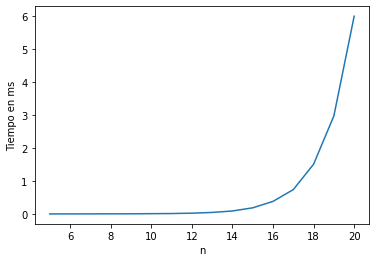

In [ ]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

x=[]; y1=[];

for n in range(5,21):
  P = cutrod_instance_generator(n)

  t1 = repeat(setup="from __main__ import recursive_cutting_rod", stmt=f"recursive_cutting_rod({P}, {n})", repeat=1, number=10)

  x.append(n)
  y1.append(t1)

plt.plot(x,y1)
plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Tiempo experimental de Cutting Rod (bottom-up)

Para este gráfico, los valores del arreglo $P$ serán generados de forma aleatoria con $n \in [5,500]$

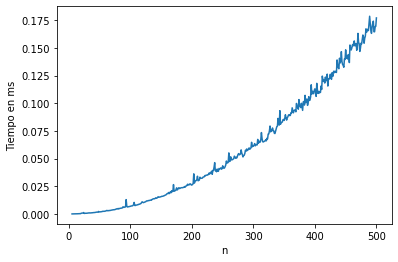

In [ ]:
x=[]; y1=[];

for n in range(5,501):
  P = cutrod_instance_generator(n)

  t1 = repeat(setup="from __main__ import dynamic_cutting_rod", stmt=f"dynamic_cutting_rod({P}, {n})", repeat=1, number=10)

  x.append(n)
  y1.append(t1)

plt.plot(x,y1)
plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Tiempo experimental para ambos algoritmos

Para este gráfico, los valores del arreglo $P$ serán generados de forma aleatoria con $n \in [5,20]$

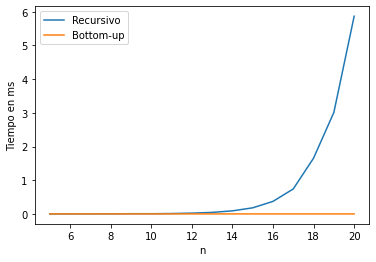

In [ ]:
x=[]; y1=[]; y2=[];

for n in range(5,21):
  P = cutrod_instance_generator(n)

  t1 = repeat(setup="from __main__ import recursive_cutting_rod", stmt=f"recursive_cutting_rod({P}, {n})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import dynamic_cutting_rod", stmt=f"dynamic_cutting_rod({P}, {n})", repeat=1, number=10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Recursivo", "Bottom-up"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados

Como se puede apreciar, el tiempo de ejecución del algoritmo recursivo crece a un nivel exponencial, mientras que, la implementación usando programación dinámica es mucho más eficiente, pues sigue una curva cuadrática.

A la hora de comparar ambos algoritmos, podemos notar que el tiempo del algoritmo recursivo predomina totalmente en el gráfico. Esto se debe a la complejidad $O(2^n)$ del algoritmo recursivo, cuya tasa de crecimiento es significativamente mayor que la complejidad $O(n^2)$ del algoritmo bottom-up.


## 5.2. Cantidad de subproblemas (bottom-up)

El siguiente gráfico compara la cantidad de subproblemas $s$ que debe resolver el algoritmo en relación al tamaño del problema, con $n \in [5,500]$

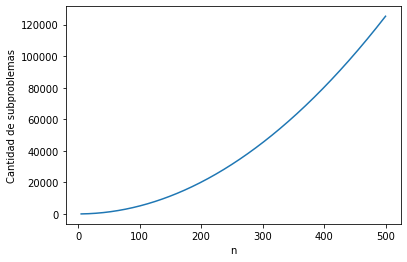

In [ ]:
import matplotlib.pyplot as plt
import random

x = []; y = []; 

for n in range(5,501):
  P = cutrod_instance_generator(n)
  s = 0
  dynamic_cutting_rod(P,n)
  x.append(n)
  y.append(s)

plt.plot(x,y)

plt.xlabel('n')
plt.ylabel('Cantidad de subproblemas')
plt.show()

### Análisis de resultados

Como era de esperarse, la cantidad de subproblemas aumenta cuadráticamente en relación al tamaño del problema $n$. Recordemos que la fórmula para calcular la cantidad de subproblemas es: 

$\sum\limits_{i=1}^{n} i=\frac{n(n+1)}{2}$

Podemos notar fácilmente que esta función posee una complejidad $O(n^2)$, lo cual se ve reflejado en el gráfico.

Algo importante a considerar es que la cantidad de subproblemas a resolver no depende del arreglo de entrada $P$, sino que solo depende del tamaño inicial del problema.

